# Fake News Detection

Welcome to the world of Fake News Detection, where we're on a mission to separate the real news from the make-believe stuff. Think of us as the "myth-busters" of the internet, armed with tools to tell fact from fiction. 

But don't worry, we won't bore you with jargon or complicated stuff. Instead, we'll make the journey fun and easy. Get ready to learn how to spot the tall tales and have a few laughs along the way, because fake news can be crazier than a squirrel on espresso!

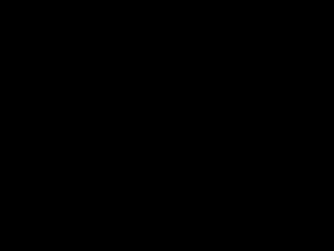

### Importing Libraries
In our mission to uncover the truth behind fake news, we need to arm ourselves with key Python libraries. These libraries will serve as our trusty companions in this digital odyssey. We'll start with 'pandas' for efficient data handling, 'numpy' for numerical prowess, and 'scikit-learn' as our guide through the world of machine learning. With these tools at our disposal, we'll be well-prepared to embark on our journey to detect and combat fake news.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

### Importing Dataset
Alright, as we start our journey to tackle fake news, we'll need to gather some important stuff – think of them as data files that hold the news stories we want to investigate. We've got two files: 'fake.csv' and 'true.csv.' 'Fake.csv' contains stories we suspect might be fake, and 'true.csv' holds the real deal – genuine news articles. These files are like our treasure maps, helping us navigate the world of information. Now, let's roll up our sleeves and bring in the computer magic to work with these files!

In [4]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [5]:
df_fake.head()

title   
0   Donald Trump Sends Out Embarrassing New Year’...  \
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject   
0  Donald Trump just couldn t wish all Americans ...    News  \
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [6]:
df_true.head()

title   
0  As U.S. budget fight looms, Republicans flip t...  \
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject   
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews  \
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

#### Inserting a column "class" as target feature

In [7]:
df_fake["class"] = 0
df_true["class"] = 1

In [8]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

###### Removing Last 10 Rows for Manual Testing

In [9]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
    
    
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [10]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

In [11]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12956\860779283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"] = 0
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12956\860779283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing["class"] = 1


In [12]:
df_fake_manual_testing.head(10)

title   
23471  Seven Iranians freed in the prisoner swap have...  \
23472                      #Hashtag Hell & The Fake Left   
23473  Astroturfing: Journalist Reveals Brainwashing ...   
23474          The New American Century: An Era of Fraud   
23475  Hillary Clinton: ‘Israel First’ (and no peace ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject   
23471  21st Century Wire says This week, the historic...  Middle-east  \
23472   By Dady Chery and Gilbert MercierAll writers ...  Middle-east   
23473  Vic Bishop Waking TimesOur reality is carefull...  Middle-east   
23474  Paul Craig RobertsIn the last years of the 20t...  Middle-east   
23475  Robert Fantina CounterpunchAlthough the United...  Middle-east   
23476  21st Century Wire says As 21WIRE reported earl...  Middle-east   
23477  21st Century Wire says It s a familiar theme. ...  Middle-east   
23478  Patrick Henningsen  21st Century WireRemember ...  Middle-east   
23479  21st Century Wire says Al Jazeera America will...  Middle-east   
23480  21st Century Wire says As 21WIRE predicted in ...  Middle-east   

                   date  class  
23471  January 20, 2016      0  
23472  January 19, 2016      0  
23473  January 19, 2016      0  
23474  January 19, 2016      0  
23475  January 18, 2016      0  
23476  January 16, 2016      0  
23477  January 16, 2016      0  
23478  January 15, 2016      0  
23479  January 14, 2016      0  
23480  January 12, 2016      0

In [13]:
df_true_manual_testing.head(10)

title   
21407  Mata Pires, owner of embattled Brazil builder ...  \
21408  U.S., North Korea clash at U.N. forum over nuc...   
21409  U.S., North Korea clash at U.N. arms forum on ...   
21410  Headless torso could belong to submarine journ...   
21411  North Korea shipments to Syria chemical arms a...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject   
21407  SAO PAULO (Reuters) - Cesar Mata Pires, the ow...  worldnews  \
21408  GENEVA (Reuters) - North Korea and the United ...  worldnews   
21409  GENEVA (Reuters) - North Korea and the United ...  worldnews   
21410  COPENHAGEN (Reuters) - Danish police said on T...  worldnews   
21411  UNITED NATIONS (Reuters) - Two North Korean sh...  worldnews   
21412  BRUSSELS (Reuters) - NATO allies on Tuesday we...  worldnews   
21413  LONDON (Reuters) - LexisNexis, a provider of l...  worldnews   
21414  MINSK (Reuters) - In the shadow of disused Sov...  worldnews   
21415  MOSCOW (Reuters) - Vatican Secretary of State ...  worldnews   
21416  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...  worldnews   

                   date  class  
21407  August 22, 2017       1  
21408  August 22, 2017       1  
21409  August 22, 2017       1  
21410  August 22, 2017       1  
21411  August 21, 2017       1  
21412  August 22, 2017       1  
21413  August 22, 2017       1  
21414  August 22, 2017       1  
21415  August 22, 2017       1  
21416  August 22, 2017       1

In [14]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

### Merging True and Fake Dataframes
In our quest to uncover the truth, we must unite the powers of 'fake.csv' and 'true.csv,' just like heroes joining forces to face a common enemy. Merging these two datasets means combining their knowledge into one mighty source. By doing this, we create a single, powerful dataset that will help us distinguish fact from fiction. So, let's forge ahead and merge these datasets to prepare for the battles that lie ahead!

In [15]:
df_merge = pd.concat([df_fake, df_true], axis = 0)
df_merge.head(15)

title   
0    Donald Trump Sends Out Embarrassing New Year’...  \
1    Drunk Bragging Trump Staffer Started Russian ...   
2    Sheriff David Clarke Becomes An Internet Joke...   
3    Trump Is So Obsessed He Even Has Obama’s Name...   
4    Pope Francis Just Called Out Donald Trump Dur...   
5    Racist Alabama Cops Brutalize Black Boy While...   
6    Fresh Off The Golf Course, Trump Lashes Out A...   
7    Trump Said Some INSANELY Racist Stuff Inside ...   
8    Former CIA Director Slams Trump Over UN Bully...   
9    WATCH: Brand-New Pro-Trump Ad Features So Muc...   
10   Papa John’s Founder Retires, Figures Out Raci...   
11   WATCH: Paul Ryan Just Told Us He Doesn’t Care...   
12   Bad News For Trump — Mitch McConnell Says No ...   
13   WATCH: Lindsey Graham Trashes Media For Portr...   
14   Heiress To Disney Empire Knows GOP Scammed Us...   

                                                 text subject   
0   Donald Trump just couldn t wish all Americans ...    News  \
1   House Intelligence Committee Chairman Devin Nu...    News   
2   On Friday, it was revealed that former Milwauk...    News   
3   On Christmas day, Donald Trump announced that ...    News   
4   Pope Francis used his annual Christmas Day mes...    News   
5   The number of cases of cops brutalizing and ki...    News   
6   Donald Trump spent a good portion of his day a...    News   
7   In the wake of yet another court decision that...    News   
8   Many people have raised the alarm regarding th...    News   
9   Just when you might have thought we d get a br...    News   
10  A centerpiece of Donald Trump s campaign, and ...    News   
11  Republicans are working overtime trying to sel...    News   
12  Republicans have had seven years to come up wi...    News   
13  The media has been talking all day about Trump...    News   
14  Abigail Disney is an heiress with brass ovarie...    News   

                 date  class  
0   December 31, 2017      0  
1   December 31, 2017      0  
2   December 30, 2017      0  
3   December 29, 2017      0  
4   December 25, 2017      0  
5   December 25, 2017      0  
6   December 23, 2017      0  
7   December 23, 2017      0  
8   December 22, 2017      0  
9   December 21, 2017      0  
10  December 21, 2017      0  
11  December 21, 2017      0  
12  December 21, 2017      0  
13  December 20, 2017      0  
14  December 20, 2017      0

In [16]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

#### Removing columns which are not required

In [17]:
df = df_merge.drop(["title", "subject", "date"], axis = 1)

In [18]:
df.isnull().sum()

text     0
class    0
dtype: int64

#### Random shuffling the Dataframe

In [19]:
df = df.sample(frac = 1)

In [20]:
df.head()

text  class
15404  And why is this person not up on domestic terr...      0
20686  NEW YORK (Reuters) - Florida Attorney General ...      1
13317  ISTANBUL (Reuters) - A Turkish professor who h...      1
7698   On December 1, 1955 in Montgomery, Alabama, Ro...      0
18206  The Washington Post   Nearly a third of territ...      0

In [21]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [22]:
df.columns

Index(['text', 'class'], dtype='object')

In [23]:
df.head()

text  class
0  And why is this person not up on domestic terr...      0
1  NEW YORK (Reuters) - Florida Attorney General ...      1
2  ISTANBUL (Reuters) - A Turkish professor who h...      1
3  On December 1, 1955 in Montgomery, Alabama, Ro...      0
4  The Washington Post   Nearly a third of territ...      0

### Creating a function to process the texts
Text preprocessing is like tidying up before a party. We clean and standardize our data by removing unnecessary characters, converting text to lowercase, and breaking it into smaller pieces. This makes the data more manageable and helps us focus on finding fake news. So, let's get cleaning!

In [24]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W", " ", text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [25]:
df["text"] = df["text"].apply(wordopt)

#### Defining Dependent and Independent variables

In [26]:
x = df["text"]
y = df["class"]

##### Absolutely, let's dive deeper into the heart of our quest! We've chosen machine learning algorithms as our champions to identify fake news.  They're like our knights in shining armor, trained to learn from the data and make predictions.

##### Now, about splitting – think of it as dividing our dataset into two parts, like a sword being sharpened before battle. We typically have a "training" slice and a "testing" slice. The training slice teaches our algorithms to recognize patterns in the data. It's our knight's training ground, where they learn how to differentiate between real and fake news. The testing slice is like the battlefield, where we unleash our trained knights to see how well they perform. This way, we can gauge their accuracy in identifying fake news.

##### By using these algorithms and data splitting, we're well-equipped for our mission – to build a reliable system that can detect fake news with confidence!

#### Splitting Training and Testing

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

#### Convert text to vectors

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

#### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [31]:
pred_lr = LR.predict(xv_test)

In [32]:
LR.score(xv_test, y_test)

0.9870766488413547

In [33]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5960
           1       0.98      0.99      0.99      5260

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



#### Decision Tree Classification

In [34]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [35]:
pred_dt = DT.predict(xv_test)

In [36]:
DT.score(xv_test, y_test)

0.9953654188948307

In [37]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5960
           1       0.99      1.00      1.00      5260

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



#### Gradient Boosting Classifier

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [39]:
pred_gbc = GBC.predict(xv_test)

In [40]:
GBC.score(xv_test, y_test)

0.9947415329768271

In [41]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5960
           1       0.99      1.00      0.99      5260

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



#### Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [43]:
pred_rfc = RFC.predict(xv_test)

In [44]:
RFC.score(xv_test, y_test)

0.9906417112299465

In [45]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5960
           1       0.99      0.99      0.99      5260

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



### Model Testing

Certainly, let's explore the final stage of our epic journey:

Model Testing: Here, as the sun sets on our quest, we put our trained machine learning models to the ultimate test. Just like a knight's skills are assessed in a tournament, we challenge our models with real-world scenarios. We present them with new, unseen news articles, and they must use their training to determine whether each one is genuine or fake.

The performance of our models is closely watched, and we use various measures like accuracy, precision, recall, and F1-score to evaluate their effectiveness. Think of this as the final battle, where our models prove their worth in the fight against misinformation.

By testing our models rigorously, we ensure that they're reliable and accurate, and ready to assist us in the ongoing battle to uncover the truth and distinguish between real and fake news in the ever-evolving world of information.






In [46]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),output_lable(pred_DT[0]),output_lable(pred_GBC[0]),output_lable(pred_RFC[0]))) 

In [47]:
news = str(input())
manual_testing(news)

21st Century Wire says This week, the historic international Iranian Nuclear Deal was punctuated by a two-way prisoner swap between Washington and Tehran, but it didn t end quite the way everyone expected. On the Iranian side, one of the U.S. citizens who was detained in Iran, Nosratollah Khosravi-Roodsari, has stayed in Iran, but on the U.S. side   all 7 of the Iranians held in U.S. prisons DID NOT show up to their flight to Geneva for the prisoner exchange   with at least 3 electing to stay in the U.S  TEHRAN SIDE: In Iran, 5 U.S. prisoners were released, with 4 of them making their way to Germany via Switzerland.Will Robinson Daily MailNone of the Iranians freed in the prisoner swap have returned home and could still be in the United States, it has been reported.The seven former inmates, who were released as part of a deal with the Islamic republic, did not show up to get a flight to Geneva, Switzerland, where the exchange was set to take place on Sunday.Three of the Iranians have d

In [50]:
news = str(input())
manual_testing(news)

SAO PAULO (Reuters) - Cesar Mata Pires, the owner and co-founder of Brazilian engineering conglomerate OAS SA, one of the largest companies involved in Brazil s corruption scandal, died on Tuesday. He was 68. Mata Pires died of a heart attack while taking a morning walk in an upscale district of S o Paulo, where OAS is based, a person with direct knowledge of the matter said. Efforts to contact his family were unsuccessful. OAS declined to comment. The son of a wealthy cattle rancher in the northeastern state of Bahia, Mata Pires  links to politicians were central to the expansion of OAS, which became Brazil s No. 4 builder earlier this decade, people familiar with his career told Reuters last year. His big break came when he befriended Antonio Carlos Magalh es, a popular politician who was Bahia governor several times, and eventually married his daughter Tereza. Brazilians joked that OAS stood for  Obras Arranjadas pelo Sogro  - or  Work Arranged by the Father-In-Law.   After years of

### With a bit of hard work and a lot of data magic, we've triumphed in our mission to detect fake news. Task completed!